In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from shogun import *

In [2]:
f = open('pim.txt')
pim = f.readline()
pim = pim.split('\t')
pim = np.array(list(map(lambda x: float(x), pim)))
f.close()

In [3]:
f = open('nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()

In [4]:
f = open('u1.txt')
u1 = f.readline()
u1 = u1.split('\t')
u1 = np.array(list(map(lambda x: float(x), u1)))
f.close()

In [5]:
rx1 = pim + nf + u1

In [6]:
f = open('u2.txt')
u2 = f.readline()
u2 = u2.split('\t')
u2 = np.array(list(map(lambda x: float(x), u2)))
f.close()

In [7]:
u2 = u2 * 2

In [8]:
rx2 = pim + nf + u2

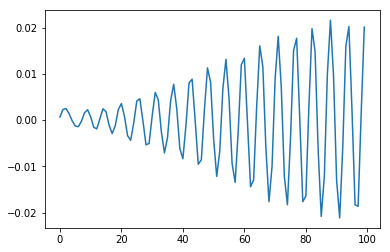

In [10]:
plt.plot(pim[:100])

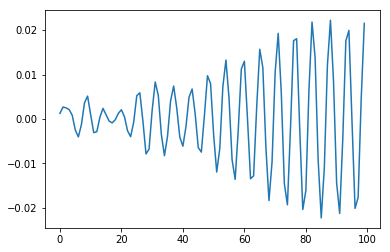

In [11]:
plt.plot((pim+nf)[:100])

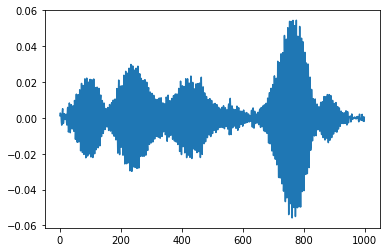

In [12]:
plt.plot((pim+nf)[:1000])

In [60]:
signal = pim + nf
signal_norm = signal / np.max(np.abs(signal))
pim_norm = pim / np.max(np.abs(pim))
np.linalg.norm(signal_norm - pim_norm)

7.706831812395897

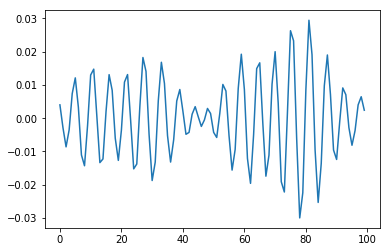

In [13]:
plt.plot((u1 + u2 * 2)[:100])

In [14]:
rx1 = rx1.reshape((250000,1))
rx2 = rx2.reshape((250000,1))
rx = np.hstack((rx1,rx2))

In [17]:
mixed_signals = RealFeatures((rx.T).astype(np.float64))

In [25]:
jade = Jade()
start = time.time()
signals = jade.apply(mixed_signals)
end = time.time() - start
S = signals.get_feature_matrix()



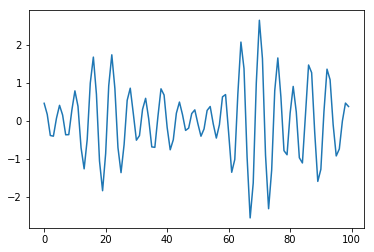

In [26]:
plt.plot(S[0,:100])

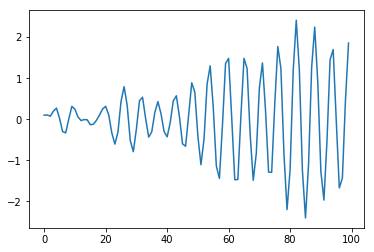

In [27]:
plt.plot(S[1,:100])

In [68]:
jade_norm = S[1,:] / np.max(np.abs(S[1,:]))
np.linalg.norm(jade_norm - signal_norm)

13.710411931649928

In [78]:
fft_values = np.fft.fft(S[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 7 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [79]:
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))

In [80]:
np.linalg.norm(filtered_samples_norm - pim_norm)

9.83600965754485

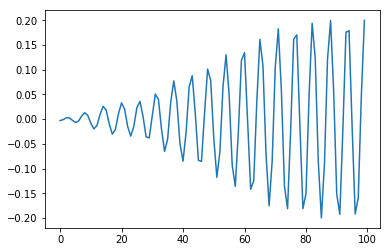

In [81]:
plt.plot(filtered_samples_norm[:100])

In [29]:
print('Time: ',end)

Time:  0.05684685707092285


In [33]:
ffsep = FFSep()
start = time.time()
signals = ffsep.apply(mixed_signals)
end = time.time() - start
S0 = signals.get_feature_matrix()


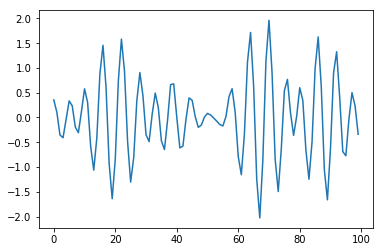

In [34]:
plt.plot(S0[0,:100])

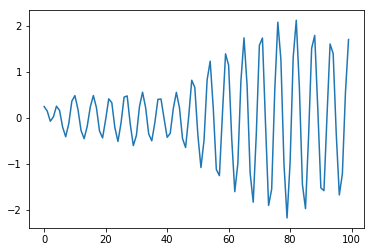

In [35]:
plt.plot(S0[1,:100])

In [82]:
ffsep_norm = S0[1,:] / np.max(np.abs(S0[1,:]))
np.linalg.norm(ffsep_norm - signal_norm)

26.092929406670343

In [93]:
fft_values = np.fft.fft(S0[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
np.linalg.norm(filtered_samples_norm - pim_norm)

24.72324484126196

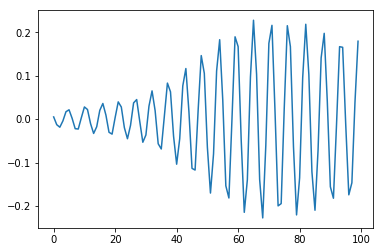

In [94]:
plt.plot(filtered_samples_norm[:100])

In [36]:
print('Time: ',end)

Time:  0.039893150329589844


In [37]:
sobi = SOBI()
start = time.time()
signals = sobi.apply(mixed_signals)
end = time.time() - start
S1 = signals.get_feature_matrix()

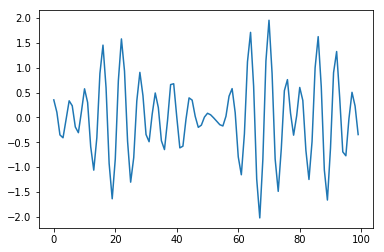

In [38]:
plt.plot(S1[0,:100])

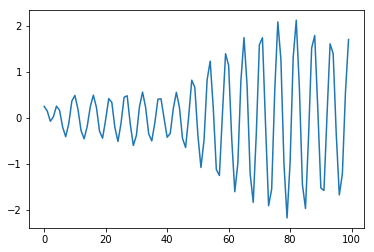

In [39]:
plt.plot(S1[1,:100])

In [107]:
sobi_norm = S1[1,:] / np.max(np.abs(S1[1,:]))
np.linalg.norm(sobi_norm - signal_norm)

26.31378797609033

In [137]:
fft_values = np.fft.fft(S1[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
np.linalg.norm(filtered_samples_norm - pim_norm)

24.946856088320935

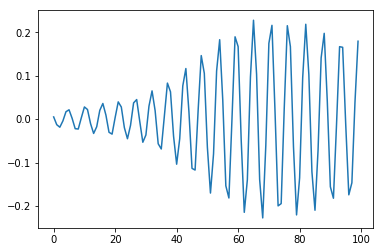

In [109]:
plt.plot(filtered_samples_norm[:100])

In [40]:
print('Time: ',end)

Time:  0.09773802757263184


In [41]:
jedisep = JediSep()
start = time.time()
signals = jedisep.apply(mixed_signals)
end = time.time() - start
S2 = signals.get_feature_matrix()

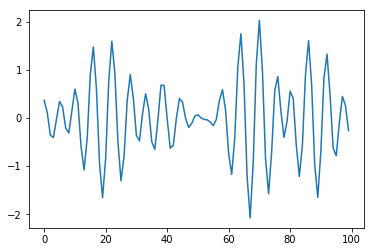

In [42]:
plt.plot(S2[0,:100])

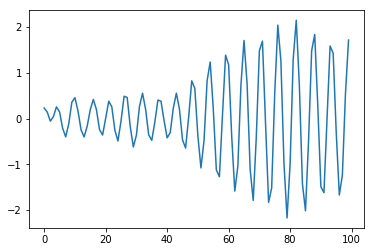

In [43]:
plt.plot(S2[1,:100])

In [110]:
jedisep_norm = S2[1,:] / np.max(np.abs(S2[1,:]))
np.linalg.norm(jedisep_norm - signal_norm)

23.860289342152807

In [111]:
fft_values = np.fft.fft(S2[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
np.linalg.norm(filtered_samples_norm - pim_norm)

22.600792727482354

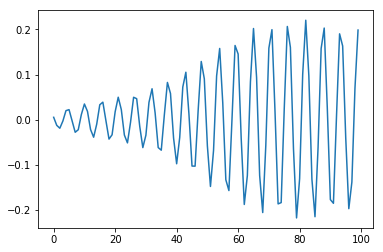

In [122]:
plt.plot(filtered_samples_norm[:100])

In [44]:
print('Time: ',end)

Time:  0.04488015174865723


In [46]:
uwedge = UWedgeSep()
start = time.time()
signals = uwedge.apply(mixed_signals)
end = time.time() - start
S3 = signals.get_feature_matrix()



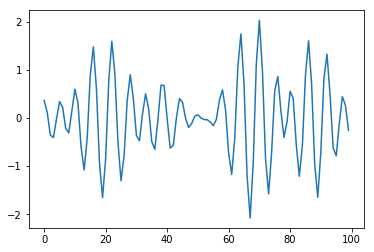

In [47]:
plt.plot(S3[0,:100])

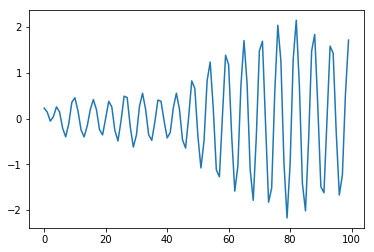

In [48]:
plt.plot(S3[1,:100])

In [112]:
uwedge_norm = S3[1,:] / np.max(np.abs(S3[1,:]))
np.linalg.norm(uwedge_norm - signal_norm)

23.776436842309703

In [127]:
fft_values = np.fft.fft(S3[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
np.linalg.norm(filtered_samples_norm - pim_norm)

22.52277120305577

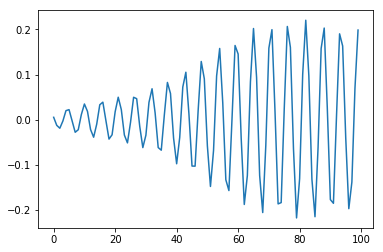

In [123]:
plt.plot(filtered_samples_norm[:100])

In [49]:
print('Time: ',end)

Time:  0.04288625717163086


In [54]:
fastica = FastICA()
start = time.time()
signals = fastica.apply(mixed_signals)
end = time.time() - start
S4 = signals.get_feature_matrix()


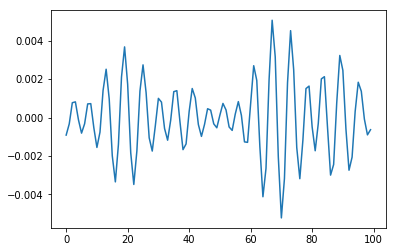

In [55]:
plt.plot(S4[0,:100])

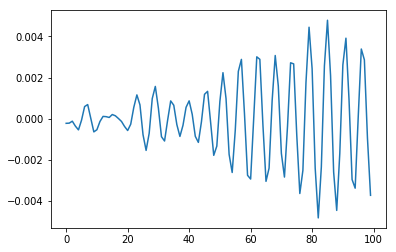

In [56]:
plt.plot(S4[1,:100])

In [125]:
fastica_norm = S4[1,:] / np.max(np.abs(S4[1,:]))
np.linalg.norm(fastica_norm + signal_norm)

13.819444694706299

In [135]:
fft_values = np.fft.fft(S4[1,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 7 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
np.linalg.norm(filtered_samples_norm + pim_norm)

10.065509046058246

In [57]:
print('Time: ',end)

Time:  0.18849515914916992


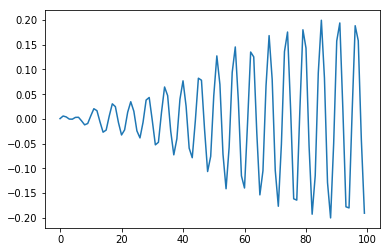

In [136]:
plt.plot(filtered_samples_norm[:100])